In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
#inspector = inspect(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
# reflect the tables
inspector.get_table_names()

NameError: name 'inspector' is not defined

In [ ]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

In [ ]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

In [9]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.date.desc()).limit(1):
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)


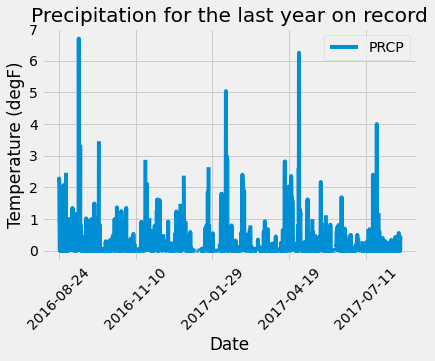

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

import datetime as dt
# Calculate the date one year from the last date in data set.
date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date).all()

# List comprehension solution
data = [{"Date": result[0], "PRCP": result[1]} for result in results]


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

df = pd.DataFrame(data, columns=['Date', 'PRCP'])
df.set_index('Date', inplace=True)
df = df.sort_values(by=['Date'])
df.plot.line()
plt.title('Precipitation for the last year on record')
plt.ylabel('Temperature (degF)')
plt.xticks(rotation=45)
plt.show()






In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
results = session.query(Station.id).count()
results

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
same_sporder = session.query(func.count(Measurement.tobs), Station.name, Station.station).group_by(Station.name).filter(Station.station == Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()


for record in same_sporder:
    (temprec_count, station_name, station_text) = record
    print(
        f"The station {station_name} / {station_text} has {temprec_count} records.")

The station WAIHEE 837.5, HI US / USC00519281 has 2772 records.
The station WAIKIKI 717.2, HI US / USC00519397 has 2724 records.
The station KANEOHE 838.1, HI US / USC00513117 has 2709 records.
The station WAIMANALO EXPERIMENTAL FARM, HI US / USC00519523 has 2669 records.
The station MANOA LYON ARBO 785.2, HI US / USC00516128 has 2612 records.
The station KUALOA RANCH HEADQUARTERS 886.9, HI US / USC00514830 has 2202 records.
The station HONOLULU OBSERVATORY 702.2, HI US / USC00511918 has 1979 records.
The station PEARL CITY, HI US / USC00517948 has 1372 records.
The station UPPER WAHIAWA 874.3, HI US / USC00518838 has 511 records.


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
       func.avg(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs)]
activestations = session.query(*sel).filter(Measurement.station == 'USC00519281').all()

for record in activestations:
    (station, ave, min, max) = record
    print(
        f"The station {station}, Waihee average temp is: {ave}, min temp is {min}, and max temp is {max}. ")

The station USC00519281, Waihee average temp is: 71.66378066378067, min temp is 54.0, and max temp is 85.0. 


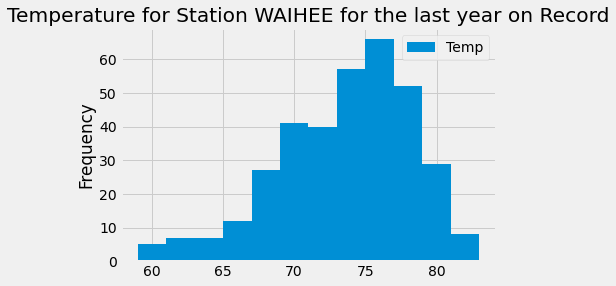

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > date).filter(Measurement.station == 'USC00519281').all()

# List comprehension solution
data = [{"Date": result[0], "Temp": result[1]} for result in results]

df = pd.DataFrame(data, columns=['Date', 'Temp'])
df.set_index('Date', inplace=True)
df = df.sort_values(by=['Date'])
df.plot.hist(df,12)
plt.title('Temperature for Station WAIHEE for the last year on Record')
plt.show()

# Close session

In [29]:
# Close Session
session.close()